In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Étape 1 : Charger le fichier
df = pd.read_csv("../data/nutrients_csvfile.csv")

# Afficher les premières lignes
print(df.head())

# Afficher les infos sur les types
print(df.info())


                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5  

In [6]:
# Remplacer les valeurs 't' par NaN
df.replace("t", pd.NA, inplace=True)

# Forcer les colonnes numériques en float
cols_to_float = ["Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs", "Grams"]
for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Supprimer les lignes avec valeurs manquantes
df_clean = df.dropna(subset=cols_to_float)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardiser les colonnes numériques
X = df_clean[cols_to_float]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)


c:\projet_stage_ete_2025\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\projet_stage_ete_2025\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\projet_stage_ete_2025\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python3

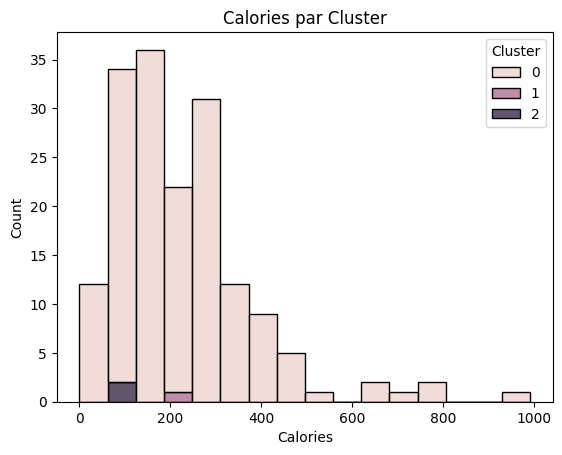

In [8]:
sns.histplot(data=df_clean, x="Calories", hue="Cluster", multiple="stack")
plt.title("Calories par Cluster")
plt.show()


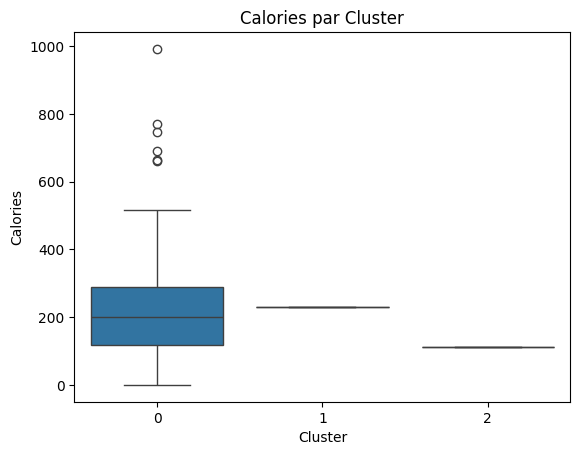

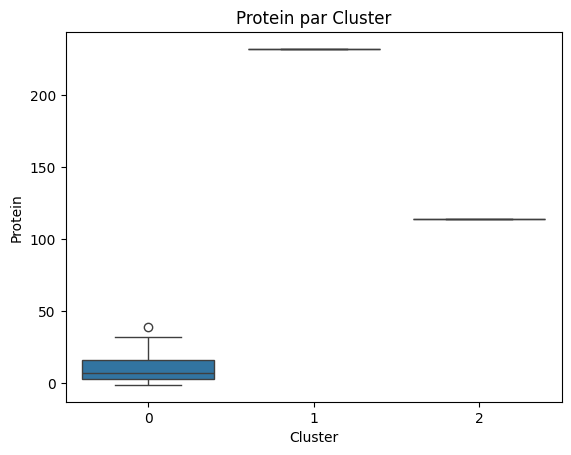

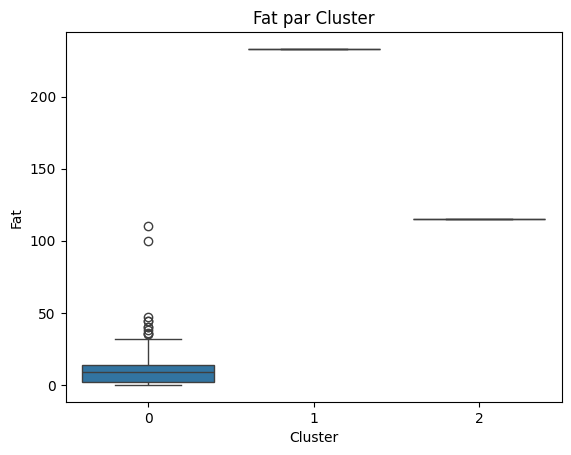

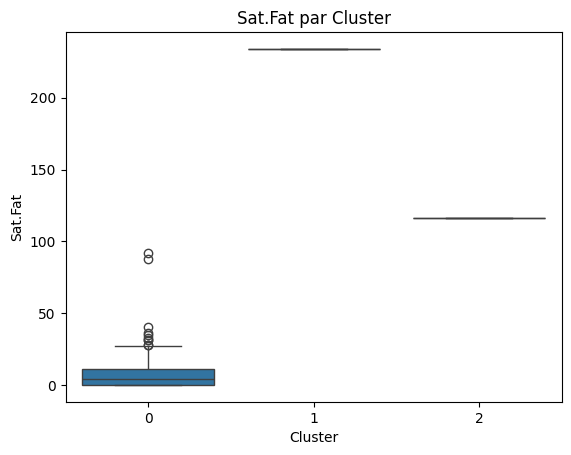

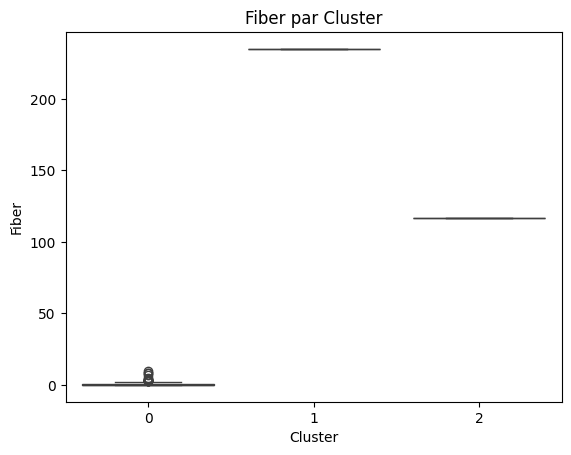

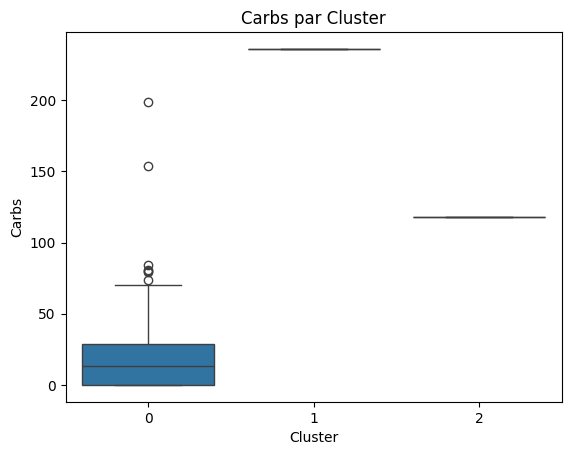

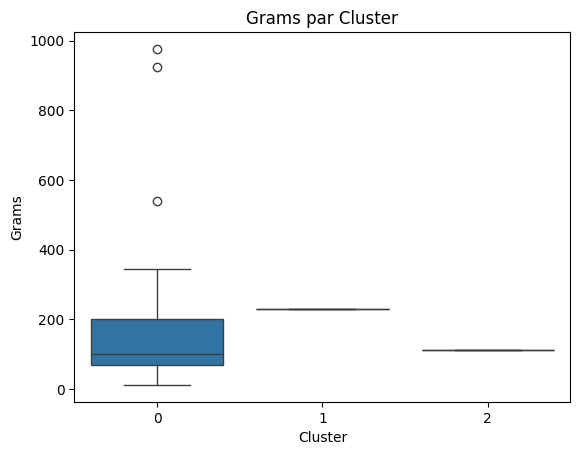

In [10]:
for col in cols_to_float:
    sns.boxplot(data=df_clean, x="Cluster", y=col)
    plt.title(f"{col} par Cluster")
    plt.show()


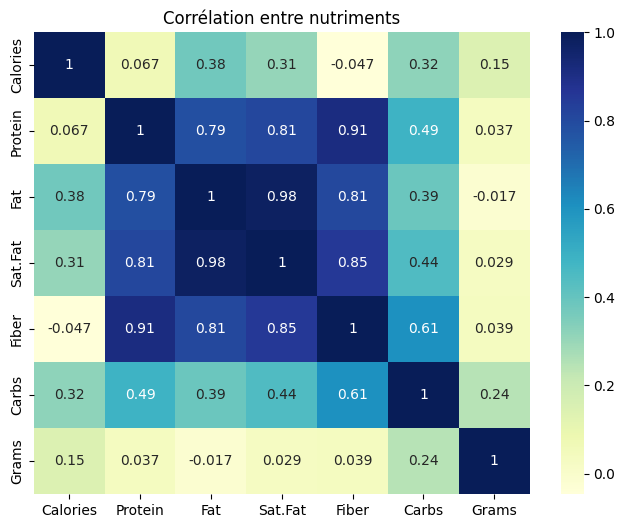

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[cols_to_float].corr(), annot=True, cmap="YlGnBu")
plt.title("Corrélation entre nutriments")
plt.show()


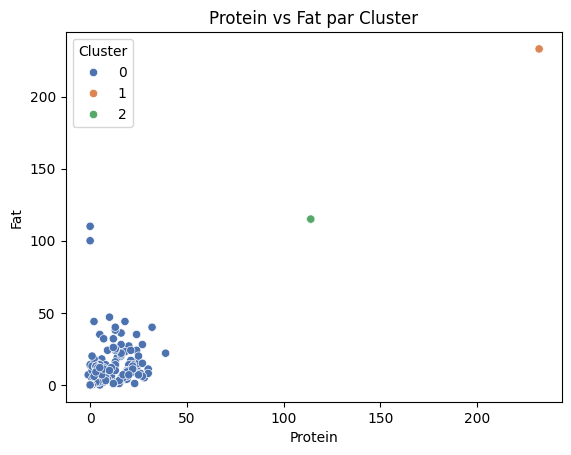

In [12]:
sns.scatterplot(data=df_clean, x="Protein", y="Fat", hue="Cluster", palette="deep")
plt.title("Protein vs Fat par Cluster")
plt.show()


In [14]:
def compute_nutriscore(row):
    score = 0
    if row["Calories"] > 500: score += 2
    if row["Fat"] > 20: score += 2
    if row["Sat.Fat"] > 10: score += 1
    if row["Fiber"] >= 3: score -= 1
    if row["Protein"] >= 10: score -= 1
    return score

# Attribuer un NutriScore de A à E
df_clean["NutriScore"] = df_clean.apply(compute_nutriscore, axis=1)
df_clean["NutriScore"] = pd.cut(
    df_clean["NutriScore"],
    bins=[-np.inf, 0, 2, 4, 6, np.inf],
    labels=["A", "B", "C", "D", "E"]
)


C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_13768\904076434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["NutriScore"] = df_clean.apply(compute_nutriscore, axis=1)
C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_13768\904076434.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["NutriScore"] = pd.cut(


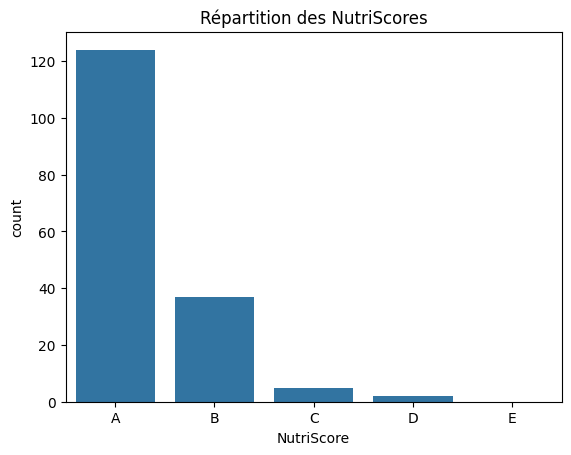

In [15]:
sns.countplot(data=df_clean, x="NutriScore", order=["A", "B", "C", "D", "E"])
plt.title("Répartition des NutriScores")
plt.show()
